# Assignment 5: Modelling the Coin-Toss Problem with PYMC3

#### By Zain Nasrullah

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


Optimization terminated successfully.
         Current function value: 8.375774
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5


100%|████████████████████████████████████| 2500/2500 [00:01<00:00, 1767.50it/s]


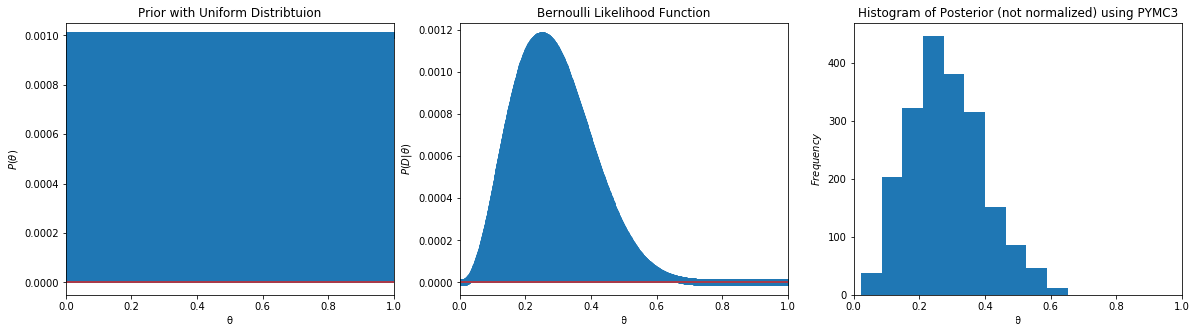

In [1]:
# Import Statements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pymc3 as pm
import scipy
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

# Specification of the data (3 heads and 9 tails out of 12 coin-tosses)
data = np.repeat([1, 0], [3, 9])

# Calculate the total number of tosses and the total number of heads (left this way for generality)
n = len(data)
h = sum(data)

# PYMC3 Code Block for statistical inference using Markov Chain Monte Carlo (MCMC) sampling
with pm.Model() as model:
    
    # Prior Distribution definition (assumed Uniform)
    prior = pm.Uniform('p_prior', lower = 0, upper = 1)
    
    # Likelihood Function definition
    likelihood = pm.Bernoulli('p_likelihood', p=prior, observed = data)
    
    # Use maximum a posteriori estimate to find starting point and use the metropolis algorithm for the step
    start = pm.find_MAP()
    step = pm.Metropolis()
    
    # Run the trace
    trace = pm.sample(2000, start = start, step = step, progressbar=True)

    
# Plot the prior and likelihood functions manually
p = np.linspace(0,1,1000)

manual_likelihood =p**(h)*(1-p)**(n-h)
                
p_prior = stats.uniform.pdf(p)
p_prior = p_prior/np.sum(p_prior)

plt.figure(figsize = (20,5))

# Plotting the prior distribution
plt.subplot(1,3,1)
plt.stem(p,p_prior, label='prior');
plt.xlim(0,1)
plt.ylabel("$P(θ)$")
plt.xlabel("θ")
plt.title('Prior with Uniform Distribtuion')

#Plotting the Likelihood function
plt.subplot(1,3,2)
plt.stem(p,manual_likelihood, label='likelihood function');
plt.xlim(0,1)
plt.ylabel("$P(D|θ)$")
plt.xlabel("θ")
plt.title('Bernoulli Likelihood Function')

# Plotting a histogram of the trace / posterior distribution after using the MCMC sampling
plt.subplot(1,3,3)
plt.hist(trace['p_prior']);
plt.xlim(0,1)
plt.ylabel("$Frequency$")
plt.xlabel("θ")
plt.title('Histogram of Posterior (not normalized) using PYMC3');

The initially Uniform prior distribution almost entirely took the shape of the Bernoulli Likelihood function after a trace of 2000 samples.   
   
In the histogram of the posterior, the distribution tends towards the critical value of approximately $\hat{θ} = 0.25$ (12 coin tosses; 3 heads and 9 tails) which agrees with the expected theoretical result: The maximum likelihood estimator in a Bernoulli experiment is the sample mean ($\bar{x}$). The traceplot can be seen below. 

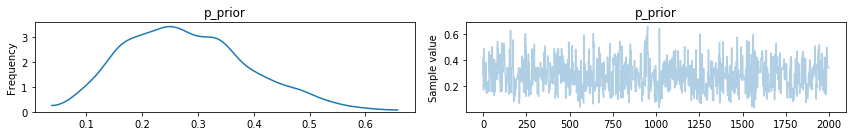

In [4]:
# Traceplot
pm.plots.traceplot(trace);